Saving ifood_df.csv to ifood_df (1).csv
Dataset:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   mari

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

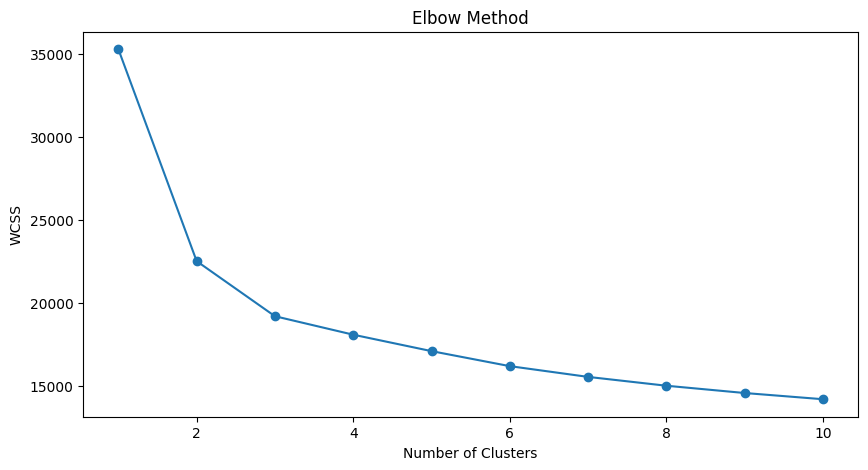

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dataset with Clusters:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Widow  \
0              172                88            88  ...              0   
1                2                 1             6  ...              0   
2              111                21            42  ...              0   
3               10                 3             5  ...              0   
4               46                27            15  ...              0   

   education_2n Cycle  education_Basic  education_G

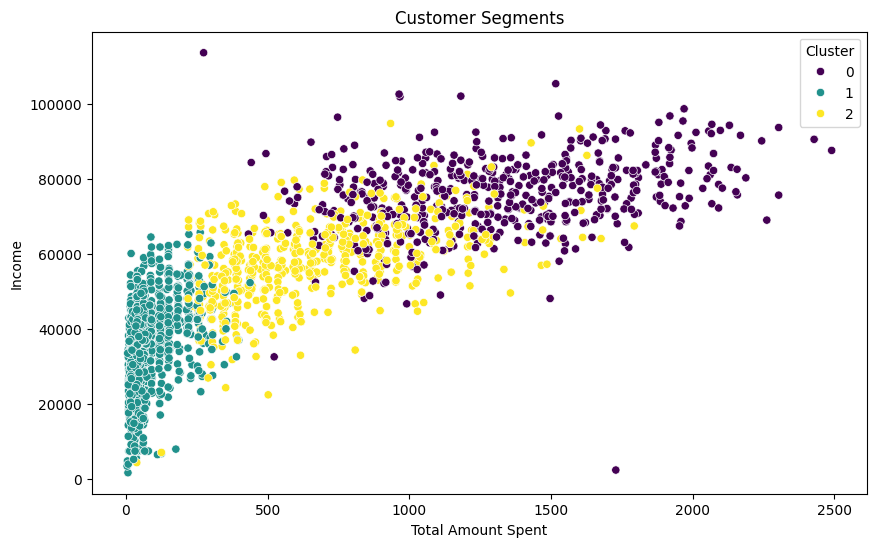

<ipython-input-2-01e705b1465e>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='MntTotal', data=df, estimator='mean', palette='viridis')


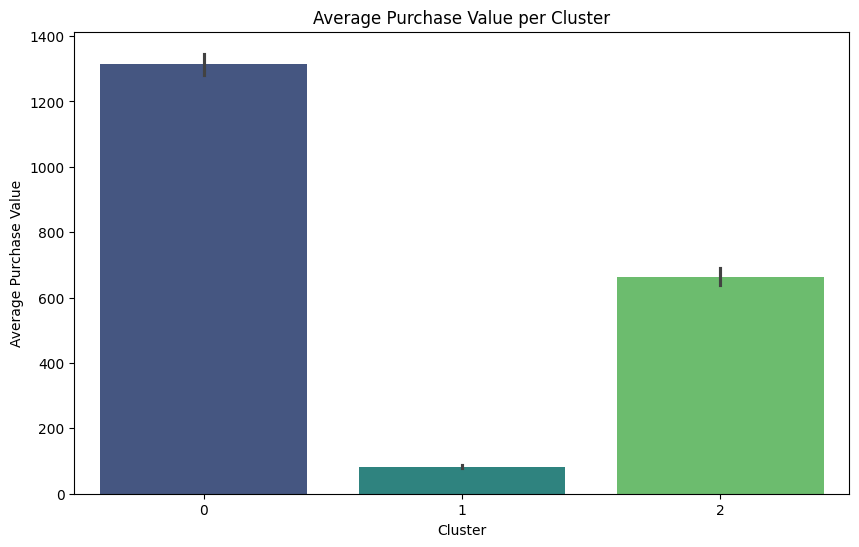

Cluster Analysis:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        75868.343206  0.041812  0.175958  49.433798  621.116725  69.322300   
1        34329.938656  0.794547  0.449854  49.176241   42.714703   4.867575   
2        57982.521523  0.223510  0.917219  48.321192  454.807947  22.233444   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             452.040070       101.080139         71.162021     77.238676   
1              23.050633         7.196689          4.972736     15.511198   
2             134.716887        29.539735         22.953642     61.061258   

         ...  marital_Together  marital_Widow  education_2n Cycle  \
Cluster  ...                                                        
0        ...          0.263066       0.041812            0.092

In [ ]:
# Step 1: Upload and Load the Dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load dataset
df = pd.read_csv('ifood_df.csv')

# Display the first few rows of the dataset
print("Dataset:")
print(df.head())

# Step 2: Data Exploration and Cleaning
# Data exploration
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling missing values if any
# Example: df.fillna(method='ffill', inplace=True)

print("\nCleaned Dataset:")
print(df.head())

# Step 3: Descriptive Statistics
# Average purchase value
average_purchase_value = df['MntTotal'].mean()
print(f"Average Purchase Value: {average_purchase_value}")

# Frequency of purchases
purchase_frequency = df['Customer_Days'].count() / df['Customer_Days'].nunique()
print(f"Average Purchase Frequency: {purchase_frequency}")

# Additional metrics as needed

# Step 4: Customer Segmentation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
               'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
               'NumWebVisitsMonth', 'MntTotal']]  # Example features

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters
print("Dataset with Clusters:")
print(df.head())

# Step 5: Visualization
import seaborn as sns

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MntTotal', y='Income', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Amount Spent')
plt.ylabel('Income')
plt.show()

# Bar chart of average purchase value per cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='MntTotal', data=df, estimator='mean', palette='viridis')
plt.title('Average Purchase Value per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Value')
plt.show()

# Step 6: Insights and Recommendations
# Analyze clusters
cluster_analysis = df.groupby('Cluster').mean()
print("Cluster Analysis:")
print(cluster_analysis)

# Provide recommendations based on the analysis
recommendations = """
1. Target high-value customers (Cluster 2) with exclusive offers and loyalty programs.
2. Increase engagement with moderate-value customers (Cluster 1) through personalized marketing.
3. Identify reasons for low-value purchases in Cluster 0 and address potential issues.
"""

print("Recommendations:")
print(recommendations)


Saving ifood_df.csv to ifood_df (3).csv
Dataset:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   mari

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

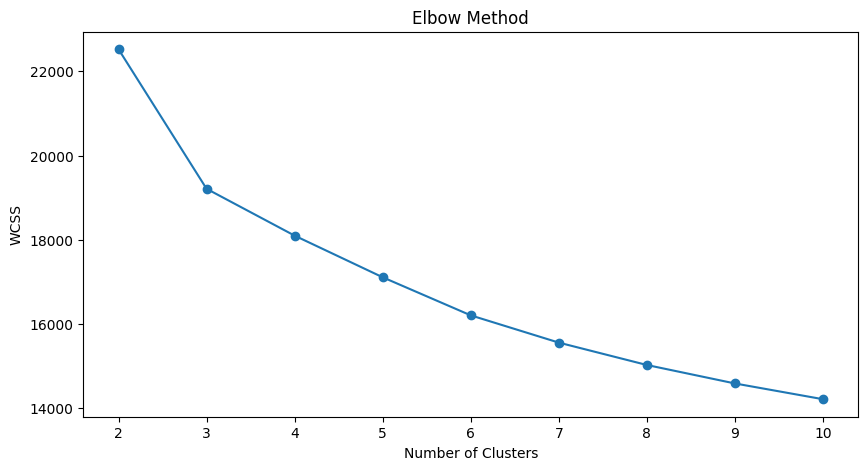

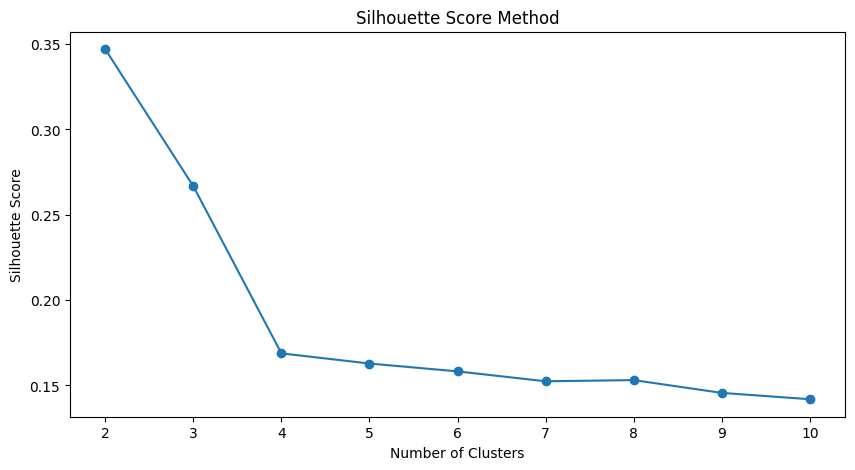

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dataset with Clusters:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Widow  \
0              172                88            88  ...              0   
1                2                 1             6  ...              0   
2              111                21            42  ...              0   
3               10                 3             5  ...              0   
4               46                27            15  ...              0   

   education_2n Cycle  education_Basic  education_G

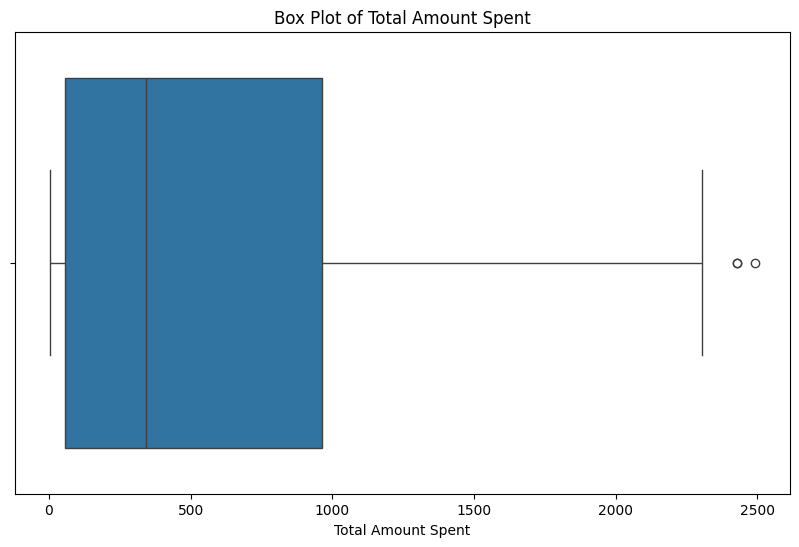

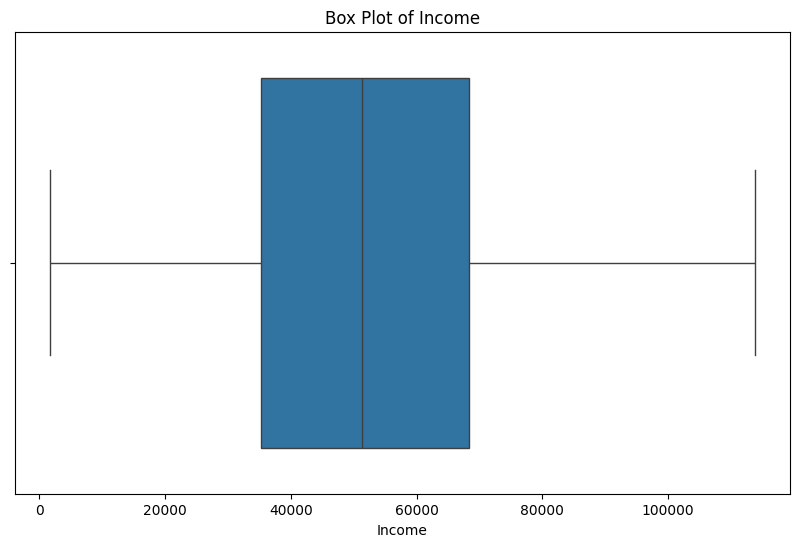

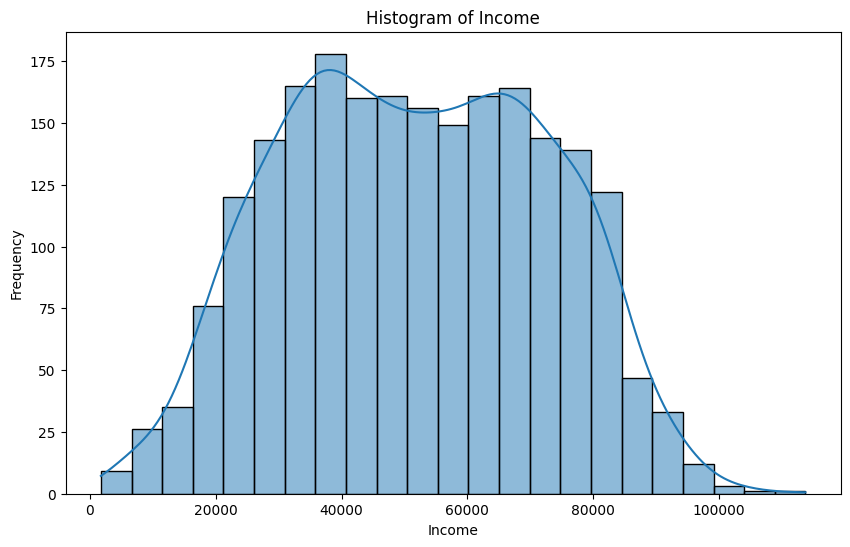

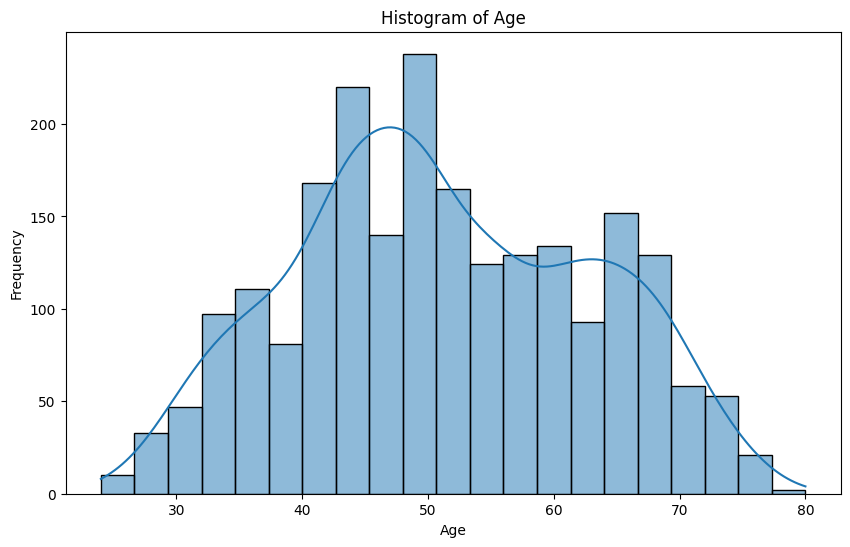

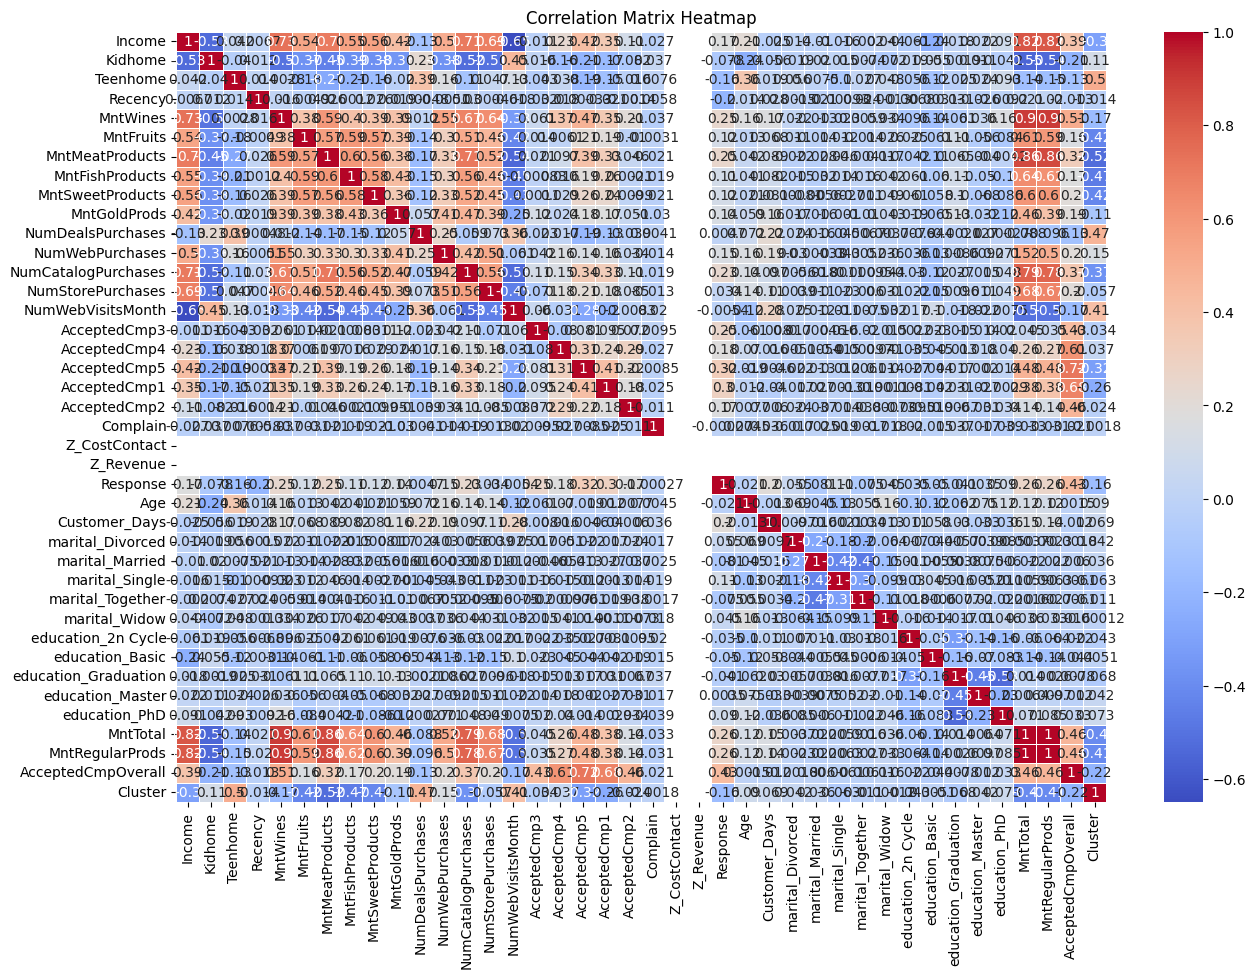

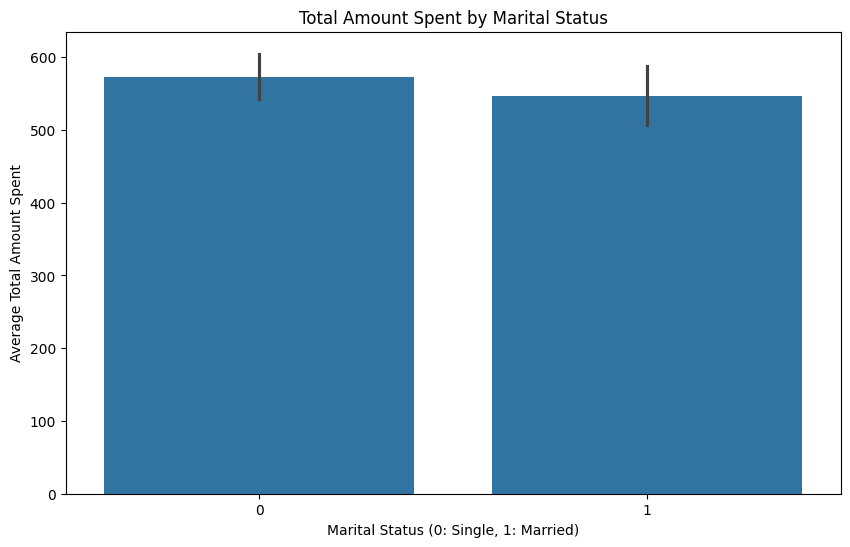

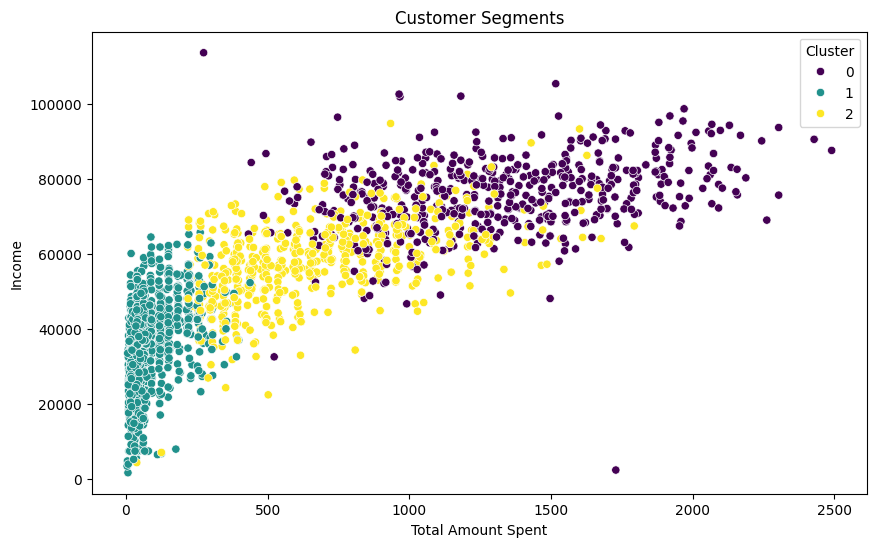

<Figure size 1000x600 with 0 Axes>

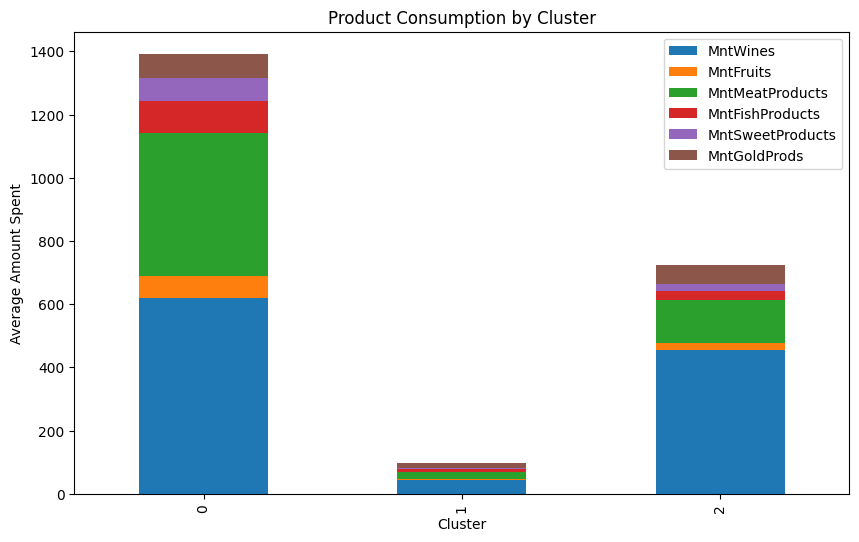

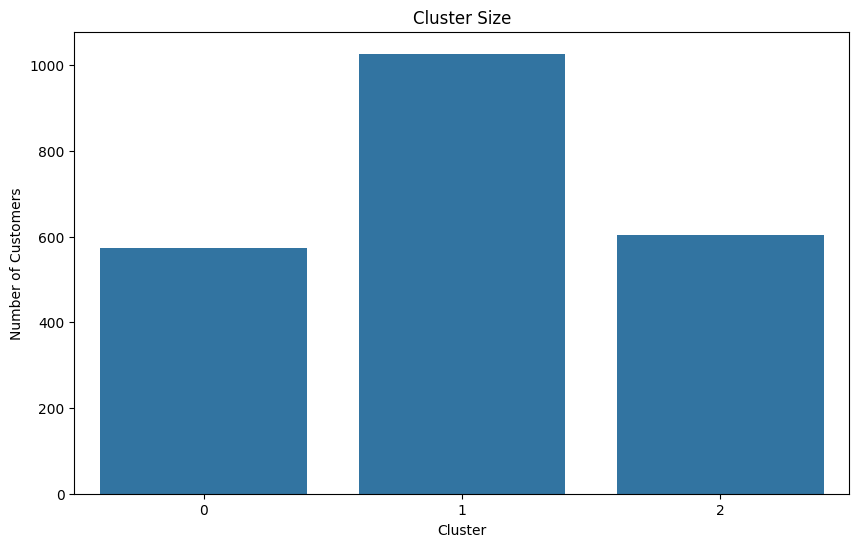

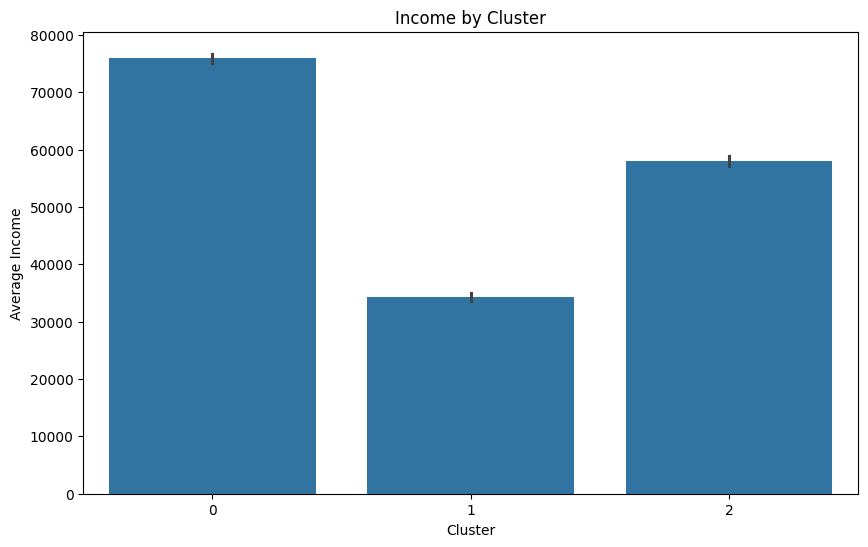

Cluster Analysis:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        75868.343206  0.041812  0.175958  49.433798  621.116725  69.322300   
1        34329.938656  0.794547  0.449854  49.176241   42.714703   4.867575   
2        57982.521523  0.223510  0.917219  48.321192  454.807947  22.233444   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             452.040070       101.080139         71.162021     77.238676   
1              23.050633         7.196689          4.972736     15.511198   
2             134.716887        29.539735         22.953642     61.061258   

         ...  marital_Together  marital_Widow  education_2n Cycle  \
Cluster  ...                                                        
0        ...          0.263066       0.041812            0.092

In [ ]:
# Step 1: Upload and Load the Dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load dataset
df = pd.read_csv('ifood_df.csv')

# Display the first few rows of the dataset
print("Dataset:")
print(df.head())

# Step 2: Data Exploration and Cleaning
# Data exploration
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling missing values if any
df.fillna(df.mean(), inplace=True)  # Fill missing values with column mean

print("\nCleaned Dataset:")
print(df.head())

# Step 3: Descriptive Statistics
# Average purchase value
average_purchase_value = df['MntTotal'].mean()
print(f"Average Purchase Value: {average_purchase_value}")

# Frequency of purchases
purchase_frequency = df['Customer_Days'].count() / df['Customer_Days'].nunique()
print(f"Average Purchase Frequency: {purchase_frequency}")

# Step 4: Customer Segmentation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering
features = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
               'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
               'NumWebVisitsMonth', 'MntTotal']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method and silhouette score
wcss = []
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Fit K-means with the optimal number of clusters
optimal_clusters = 3  # Example with 3 clusters, choose based on above plots
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters
print("Dataset with Clusters:")
print(df.head())

# Step 5: Visualization

# Box plot for MntTotal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MntTotal'])
plt.title('Box Plot of Total Amount Spent')
plt.xlabel('Total Amount Spent')
plt.show()

# Box plot and histogram for Income
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Box Plot of Income')
plt.xlabel('Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# MntTotal by marital status
plt.figure(figsize=(10, 6))
sns.barplot(x='marital_Married', y='MntTotal', data=df, estimator='mean')
plt.title('Total Amount Spent by Marital Status')
plt.xlabel('Marital Status (0: Single, 1: Married)')
plt.ylabel('Average Total Amount Spent')
plt.show()

# Clustered data visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MntTotal', y='Income', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Amount Spent')
plt.ylabel('Income')
plt.show()

# Product consumption by cluster
plt.figure(figsize=(10, 6))
cluster_means = df.groupby('Cluster')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
cluster_means.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Product Consumption by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Amount Spent')
plt.legend(loc='upper right')
plt.show()

# Cluster size
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Size')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# Income by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Income', data=df, estimator='mean')
plt.title('Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Income')
plt.show()

# Step 6: Insights and Recommendations
# Analyze clusters
cluster_analysis = df.groupby('Cluster').mean()
print("Cluster Analysis:")
print(cluster_analysis)

# Provide recommendations based on the analysis
recommendations = """
1. Target high-value customers (Cluster 2) with exclusive offers and loyalty programs.
2. Increase engagement with moderate-value customers (Cluster 1) through personalized marketing.
3. Identify reasons for low-value purchases in Cluster 0 and address potential issues.
"""

print("Recommendations:")
print(recommendations)

